# Analyzing 50 Years of Tennis
## Analysis of ATP Tennis competitions from 1968 to 2018

_This project seeks to analyze data from men’s ATP tennis competitions from the year 1968 up to 2018, including Grand Slams, Masters Series, Masters Cup and International Series competitions._

The __[dataset](https://github.com/JeffSackmann/tennis_atp)__ prepared by __[Jeff Sackmann](https://github.com/JeffSackmann)__ contains information on every single match played since 1968. It includes details on every match’s date, location, tournament type, surface, winner and loser, games/sets played, duration and additional statistics such as players’ rankings, players’ age and height, aces, double faults, break points faced and saved, service points among other helpful stats for both players of the match.

The objective of this analysis is to come up with insights regarding the tournaments including correlation between variables (e.g. aces and players’ height) as well as the evolution of the players over time, looking at the different variables and using different types of visualizations as tools to facilitate interpretation of the data and communication of the results.

In [205]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import seaborn as sns
import numpy as np
import random
import os
import glob
sns.set_style('white')

%matplotlib inline

plt.rcParams.update({'font.size': 14})

## Loading and Initial Exploration

In [206]:
# Load data files from 1968 to 2018
path ='tennis_atp_data_final' 
files = glob.glob(path + "/*.csv")
tennis_df = pd.concat((pd.read_csv(f) for f in files))

In [207]:
# Create new columns storing year and year/month attributes
tennis_df['tourney_yearmonth'] = tennis_df.tourney_date.astype(str).str[:6]
tennis_df['tourney_year'] = tennis_df.tourney_date.astype(str).str[:4]

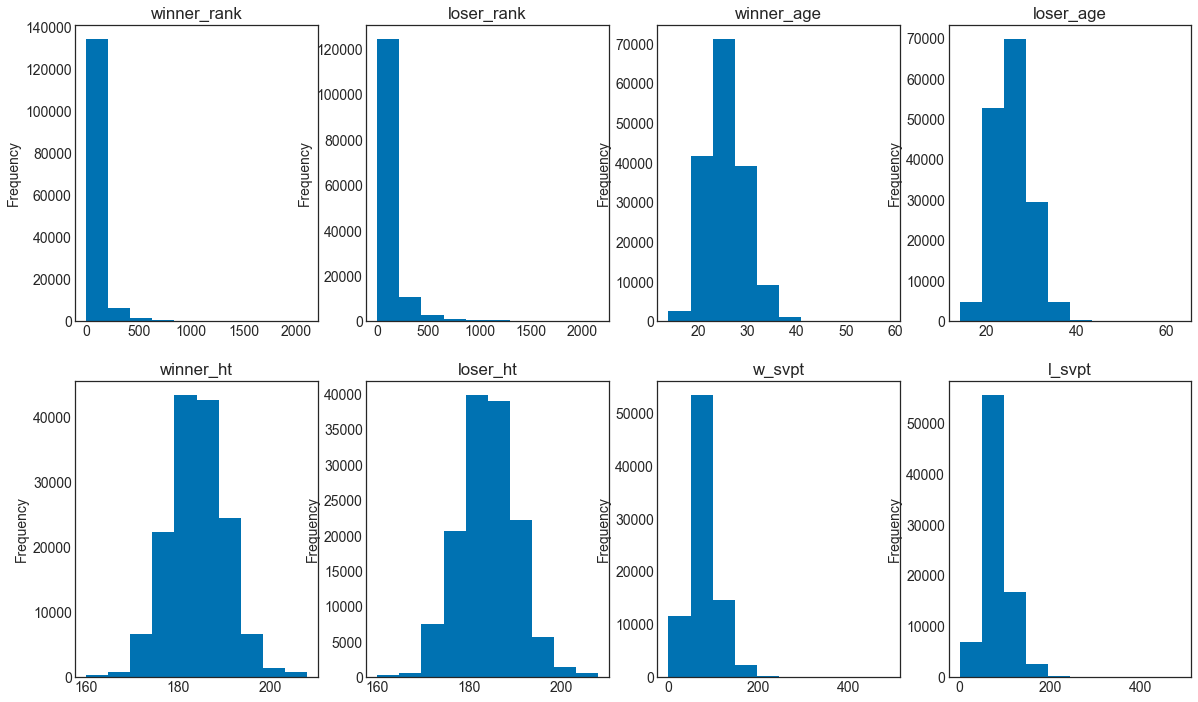

In [208]:
dimensions = ['winner_rank','loser_rank','winner_age','loser_age','winner_ht','loser_ht','w_svpt','l_svpt']

plt.figure(1, figsize=(20,12))

for i in range(1,9):
    plt.subplot(2,4,i)
    tennis_df[dimensions[i-1]].plot(kind='hist', title=dimensions[i-1])

## Analysis of multiple variables
A pairplot can be useful to look at different variables. In this plot we look at minutes, loser rank and winner rank of finals for Masters (M) and Grand Slam (G) tournaments from 2010 until 2016

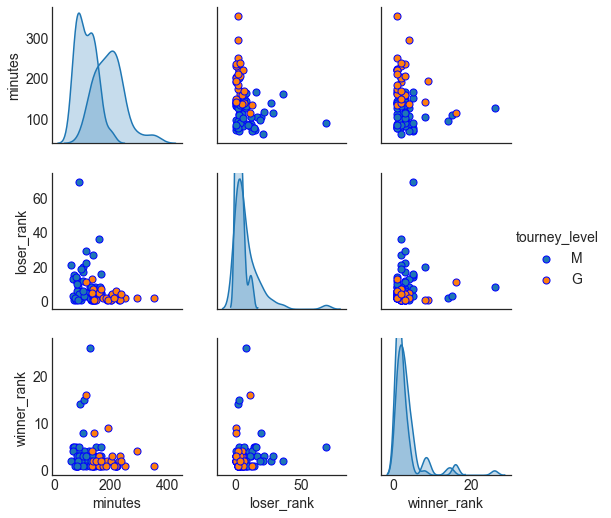

In [81]:
# Use pairplot to draw multiple variables at once
df_pp = tennis_df[tennis_df['tourney_year'].between('2010','2016')&tennis_df['tourney_level'].isin(['M','G'])&tennis_df['round'].isin(['F'])][['minutes','loser_rank','winner_rank','tourney_level']].dropna()

sns.pairplot(df_pp, hue='tourney_level',diag_kind="kde", plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))


## Evolution of players' ranking getting into Grand Slam finals

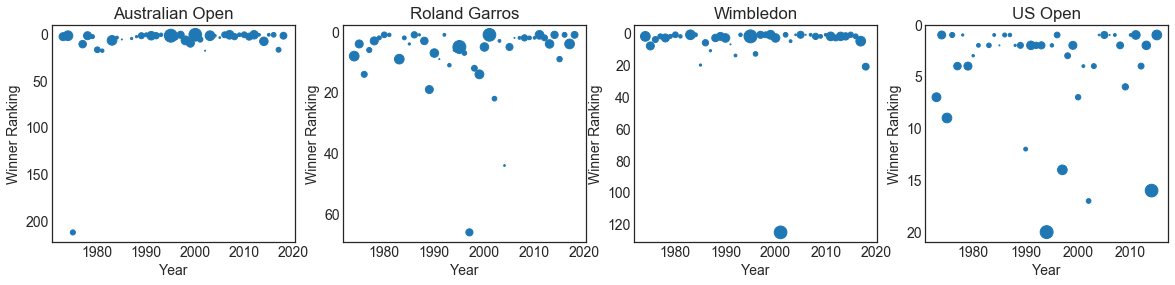

In [114]:
tourneys = ['Australian Open','Roland Garros','Wimbledon','US Open']

tennis_df_1 = tennis_df[~np.isnan(tennis_df['winner_rank']) & (tennis_df['round']=='F')].copy()
plt.figure(figsize=(20,4))

for i in range(1,5):
    plt.subplot(1,4,i)
    plt.title(tourneys[i-1])
    plt.scatter(tennis_df_1[tennis_df_1['tourney_name']==tourneys[i-1]]['tourney_year'],tennis_df_1[tennis_df_1['tourney_name']==tourneys[i-1]]['winner_rank'], s=tennis_df_1['loser_rank'])
    plt.gca().invert_yaxis()
    plt.xlabel('Year')
    plt.ylabel('Winner Ranking')

## Distribution of aces by surface type

[<matplotlib.text.Text at 0x119db2be0>, <matplotlib.text.Text at 0x116f97f28>]

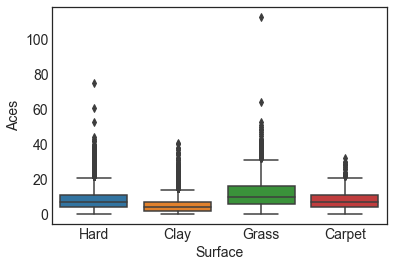

In [83]:
tennis_df_h = tennis_df[~np.isnan(tennis_df['w_ace']) & (tennis_df['tourney_level'].isin(['G','M'])) ].copy()
g = sns.boxplot(x="surface", y="w_ace", data=tennis_df_h)
g.set(xlabel='Surface', ylabel='Aces')

## Evolution of top countries represented by their players

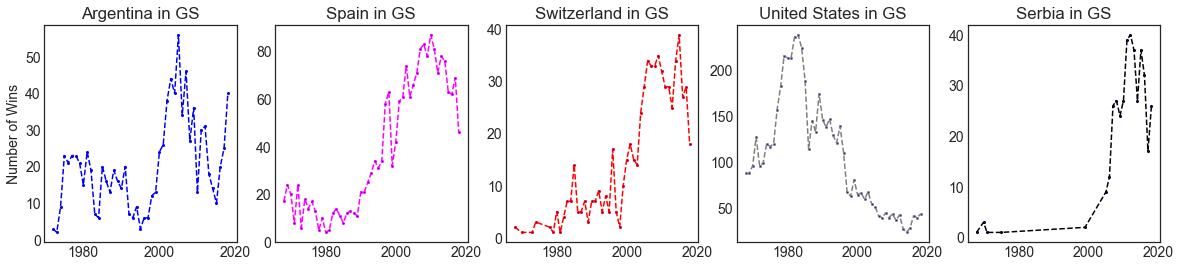

In [226]:
plt.figure(figsize=(20,4))

countries = {'ARG':'Argentina','ESP':'Spain','SUI':'Switzerland','USA':'United States','SRB':'Serbia'}
colors = ['blue','magenta','red','grey','black']

i=1
for k,v in countries.items():
    plt.subplot(1,5,i)
    s = tennis_df[(tennis_df['tourney_level'] == 'G') & (tennis_df['winner_ioc'].isin([k]))].groupby(['tourney_year','winner_ioc'], as_index=False).agg('count')
    plt.plot(s['tourney_year'], s['tourney_id'], color=colors[i-1], linestyle='dashed', marker='o', markerfacecolor='blue', markersize=2)
    if i==1:
        plt.ylabel('Number of Wins')
    plt.title(v+' in GS')
    i=i+1
    

## Top most Aces, Double Faults and Break Points Saved

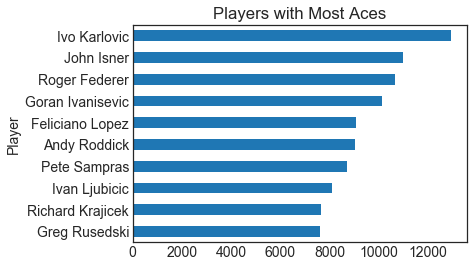

In [177]:
sw = tennis_df.groupby(['winner_name']).agg({'w_ace':'sum'}).fillna(0).sort_values(['w_ace'], ascending=False)
sl = tennis_df.groupby(['loser_name']).agg({'l_ace':'sum'}).fillna(0).sort_values(['l_ace'], ascending=False)
dfs = [sw,sl]
r = pd.concat(dfs).reset_index().fillna(0)
r['aces'] = r['l_ace']+r['w_ace']
final = r.groupby('index').agg({'aces':'sum'}).sort_values('aces',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','Aces']
final = final.sort_values('Aces',ascending=True)
final.plot('Player','Aces', kind='barh', title='Players with Most Aces', legend=False)

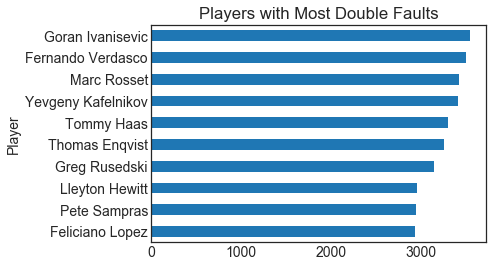

In [178]:
sw = tennis_df.groupby(['winner_name']).agg({'w_df':'sum'}).fillna(0).sort_values(['w_df'], ascending=False)
sl = tennis_df.groupby(['loser_name']).agg({'l_df':'sum'}).fillna(0).sort_values(['l_df'], ascending=False)
dfs = [sw,sl]
r = pd.concat(dfs).reset_index().fillna(0)
r['dfs'] = r['l_df']+r['w_df']
final = r.groupby('index').agg({'dfs':'sum'}).sort_values('dfs',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','DoubleFaults']
final = final.sort_values('DoubleFaults',ascending=True)
final.plot('Player','DoubleFaults', kind='barh', title='Players with Most Double Faults', legend=False)

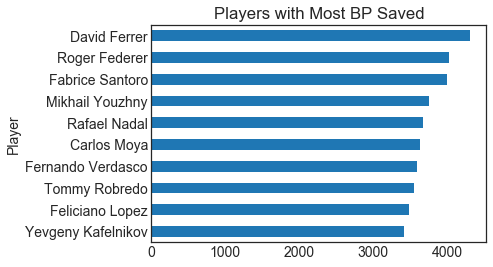

In [117]:
sw = tennis_df.groupby(['winner_name']).agg({'w_bpSaved':'sum'}).fillna(0).sort_values(['w_bpSaved'], ascending=False)
sl = tennis_df.groupby(['loser_name']).agg({'l_bpSaved':'sum'}).fillna(0).sort_values(['l_bpSaved'], ascending=False)
dfs = [sw,sl]
r = pd.concat(dfs).reset_index().fillna(0)
r['dfs'] = r['l_bpSaved']+r['w_bpSaved']
final = r.groupby('index').agg({'dfs':'sum'}).sort_values('dfs',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','BreakPointsSaved']
final = final.sort_values('BreakPointsSaved',ascending=True)
final.plot('Player','BreakPointsSaved', kind='barh', title='Players with Most BP Saved', legend=False)

## Evolution of top players in their career

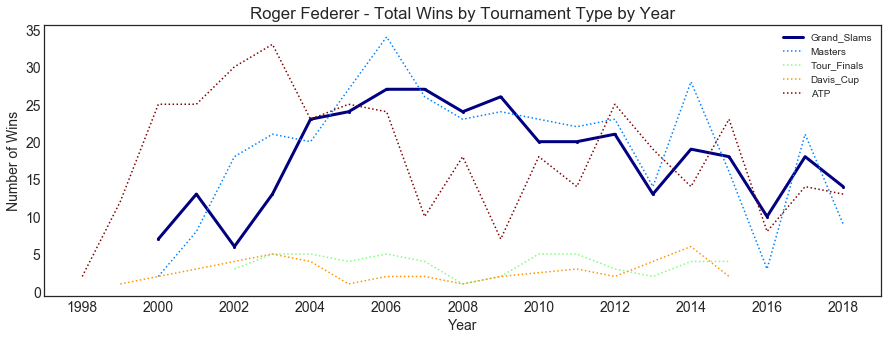

In [215]:
from matplotlib.ticker import MultipleLocator, StrMethodFormatter

def plot_history_player(player):
    
    pldf_1 = tennis_df[(tennis_df['winner_name'] == player)].groupby(['tourney_year','tourney_level'], as_index=False).agg(['count'])
    pldf_2 = pldf_1['tourney_id'].reset_index()

    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

    plt.gca().xaxis.set_major_locator(MultipleLocator(2))
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))

    plt.title(player+' - Total Wins by Tournament Type by Year')
    plt.ylabel('Number of Wins')
    plt.xlabel('Year')

    plt.plot(pldf_2[pldf_2['tourney_level']=='G']['tourney_year'], pldf_2[pldf_2['tourney_level']=='G']['count'], marker='o', markerfacecolor='black', markersize=2, linewidth=3)
    plt.plot(pldf_2[pldf_2['tourney_level']=='M']['tourney_year'], pldf_2[pldf_2['tourney_level']=='M']['count'], linestyle='dotted')
    plt.plot(pldf_2[pldf_2['tourney_level']=='F']['tourney_year'], pldf_2[pldf_2['tourney_level']=='F']['count'], linestyle='dotted')
    plt.plot(pldf_2[pldf_2['tourney_level']=='D']['tourney_year'], pldf_2[pldf_2['tourney_level']=='D']['count'], linestyle='dotted')
    plt.plot(pldf_2[pldf_2['tourney_level']=='A']['tourney_year'], pldf_2[pldf_2['tourney_level']=='A']['count'], linestyle='dotted')

    plt.legend(['Grand_Slams', 'Masters', 'Tour_Finals', 'Davis_Cup', 'ATP'], loc='upper right', prop={'size': 10})
  
plot_history_player('Roger Federer')

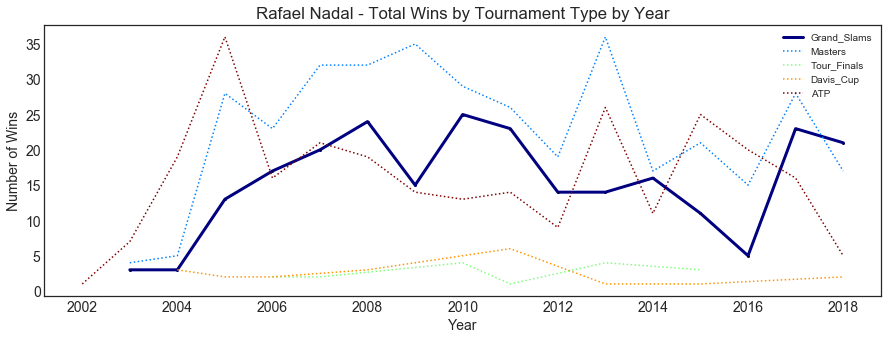

In [216]:
plot_history_player('Rafael Nadal')

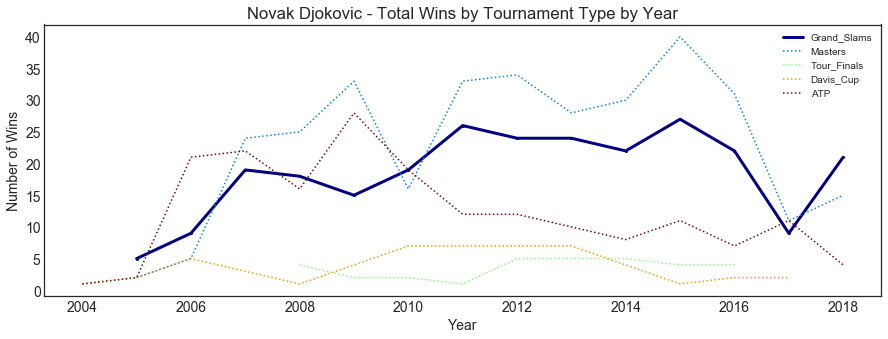

In [217]:
plot_history_player('Novak Djokovic')

## Dominance: Unique number of players that won most important tournaments

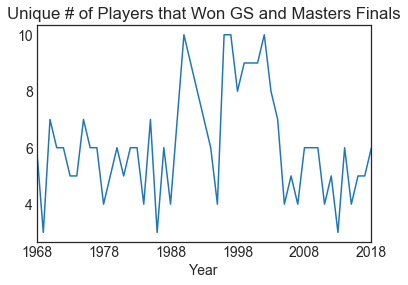

In [180]:
# Unique number of tournament winner per year from 2000 to 2016 (show dominance of top players)
s = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['M','G']))].groupby(['tourney_year']).agg({'winner_name':'nunique'})
t= s.reset_index()
t.columns=['Year','Unique_Winners']
t.plot('Year', 'Unique_Winners', kind='line', title='Unique # of Players that Won GS and Masters Finals', legend=False)

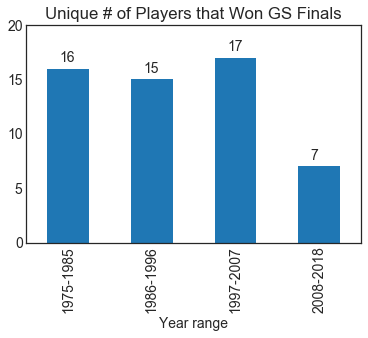

In [181]:
# Unique number of tournament winner per year from 2000 to 2016 (show dominance of top players)
s = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['G']))&(tennis_df['tourney_year'].between('1975','1985'))].agg({'winner_name':'nunique'})
t = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['G']))&(tennis_df['tourney_year'].between('1986','1996'))].agg({'winner_name':'nunique'})
u = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['G']))&(tennis_df['tourney_year'].between('1997','2007'))].agg({'winner_name':'nunique'})
v = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['G']))&(tennis_df['tourney_year'].between('2008','2018'))].agg({'winner_name':'nunique'})

s['1975-1985'] = s['winner_name']
s=s.drop('winner_name')
t['1986-1996'] = t['winner_name']
t=t.drop('winner_name')
u['1997-2007'] = u['winner_name']
u=u.drop('winner_name')
v['2008-2018'] = v['winner_name']
v=v.drop('winner_name')

dfl = [s,t,u,v]
dfs = pd.concat(dfl)
x=pd.DataFrame(dfs, columns=['Unique_Count']).reset_index()
x.columns=['Year range','Unique winners']
ax=x.plot('Year range', 'Unique winners', kind='bar', title='Unique # of Players that Won GS Finals', legend=False)
ax.set_ylim(0,20)

for i, v in enumerate(x['Unique winners']):
    ax.text(i-0.1, v+0.6, str(v))
    

## Relationship between Aces and Height of players

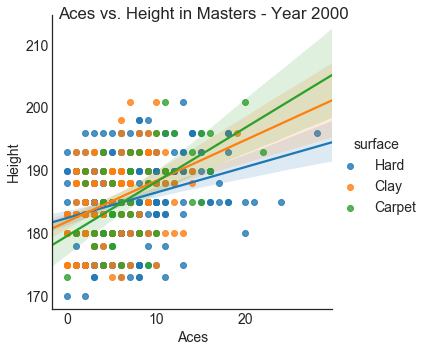

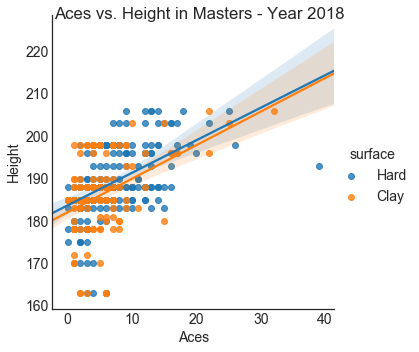

In [183]:

g1 = sns.lmplot(x='w_ace', y='winner_ht', hue='surface', fit_reg=True, data=tennis_df[(tennis_df['tourney_level'].isin(['M']))&(tennis_df['tourney_year']=='2000')])
g1.fig.suptitle('Aces vs. Height in Masters - Year 2000') 
g1.set(xlabel='Aces', ylabel='Height')

g2 = sns.lmplot(x='w_ace', y='winner_ht', hue='surface', fit_reg=True, data=tennis_df[(tennis_df['tourney_level'].isin(['M']))&(tennis_df['tourney_year']=='2018')])
g2.fig.suptitle('Aces vs. Height in Masters - Year 2018')
g2.set(xlabel='Aces', ylabel='Height')




## Effectiveness of top players by surface type

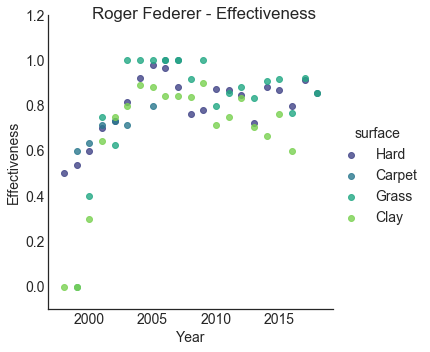

In [218]:
from matplotlib.ticker import MultipleLocator, StrMethodFormatter

def plot_effectiveness(player):
    pw = tennis_df[(tennis_df['winner_name'] == player)].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
    pww = pw['tourney_id'].reset_index()

    pl = tennis_df[(tennis_df['loser_name'] == player)].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
    pll = pl['tourney_id'].reset_index()

    pww.columns = ['tourney_year','surface','wins']
    pll.columns = ['tourney_year','surface','loses']

    dfs = (pww,pll)

    dfs_concat = pd.concat(dfs)

    dfs_final = dfs_concat.fillna(0).groupby(['tourney_year','surface']).agg({'wins':'sum','loses':'sum'}).reset_index()

    dfs_final['r_eff'] = np.where(dfs_final['loses']>0, dfs_final['wins']/(dfs_final['wins']+dfs_final['loses']), 1)
    dfs_final['tourney_year'] = dfs_final['tourney_year'].astype(int)

    g = sns.lmplot(x='tourney_year', y='r_eff', hue='surface', fit_reg=False, data=dfs_final, palette='viridis', hue_order=['Hard','Carpet','Grass','Clay'])
    g.fig.suptitle(player + ' - Effectiveness')
    g.set(xlabel='Year', ylabel='Effectiveness')
    g.set(ylim=(-0.1,1.2))

plot_effectiveness('Roger Federer')

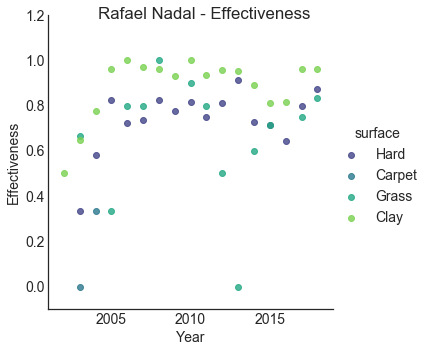

In [33]:
pw = tennis_df[(tennis_df['winner_name'] == 'Rafael Nadal')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
pww = pw['tourney_id'].reset_index()

pl = tennis_df[(tennis_df['loser_name'] == 'Rafael Nadal')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
pll = pl['tourney_id'].reset_index()

pww.columns = ['tourney_year','surface','wins']
pll.columns = ['tourney_year','surface','loses']

dfs = (pww,pll)

dfs_concat = pd.concat(dfs)

dfs_final = dfs_concat.fillna(0).groupby(['tourney_year','surface']).agg({'wins':'sum','loses':'sum'}).reset_index()

dfs_final['r_eff'] = np.where(dfs_final['loses']>0, dfs_final['wins']/(dfs_final['wins']+dfs_final['loses']), 1)
dfs_final['tourney_year'] = dfs_final['tourney_year'].astype(int)

g = sns.lmplot(x='tourney_year', y='r_eff', hue='surface', fit_reg=False, data=dfs_final, palette='viridis', hue_order=['Hard','Carpet','Grass','Clay'])
g.fig.suptitle('Rafael Nadal - Effectiveness')
g.set(xlabel='Year', ylabel='Effectiveness')
g.set(ylim=(-0.1,1.2))

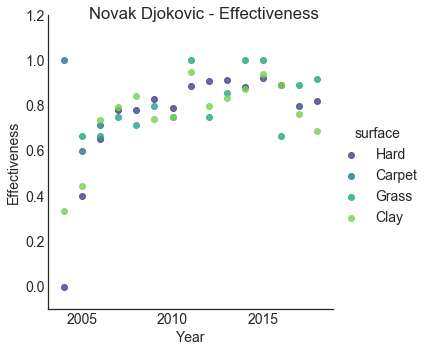

In [34]:
pw = tennis_df[(tennis_df['winner_name'] == 'Novak Djokovic')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
pww = pw['tourney_id'].reset_index()

pl = tennis_df[(tennis_df['loser_name'] == 'Novak Djokovic')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
pll = pl['tourney_id'].reset_index()

pww.columns = ['tourney_year','surface','wins']
pll.columns = ['tourney_year','surface','loses']

dfs = (pww,pll)

dfs_concat = pd.concat(dfs)

dfs_final = dfs_concat.fillna(0).groupby(['tourney_year','surface']).agg({'wins':'sum','loses':'sum'}).reset_index()

dfs_final['r_eff'] = np.where(dfs_final['loses']>0, dfs_final['wins']/(dfs_final['wins']+dfs_final['loses']), 1)
dfs_final['tourney_year'] = dfs_final['tourney_year'].astype(int)

g = sns.lmplot(x='tourney_year', y='r_eff', hue='surface', fit_reg=False, data=dfs_final, palette='viridis', hue_order=['Hard','Carpet','Grass','Clay'])
g.fig.suptitle('Novak Djokovic - Effectiveness')
g.set(xlabel='Year', ylabel='Effectiveness')
g.set(ylim=(-0.1,1.2))

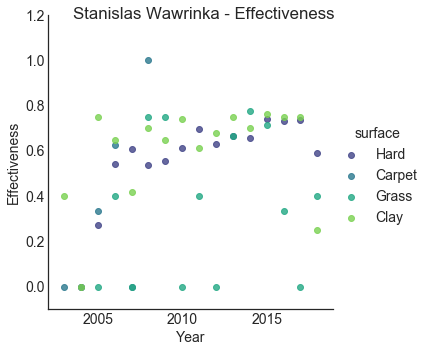

In [35]:
pw = tennis_df[(tennis_df['winner_name'] == 'Stanislas Wawrinka')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
pww = pw['tourney_id'].reset_index()

pl = tennis_df[(tennis_df['loser_name'] == 'Stanislas Wawrinka')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
pll = pl['tourney_id'].reset_index()

pww.columns = ['tourney_year','surface','wins']
pll.columns = ['tourney_year','surface','loses']

dfs = (pww,pll)

dfs_concat = pd.concat(dfs)

dfs_final = dfs_concat.fillna(0).groupby(['tourney_year','surface']).agg({'wins':'sum','loses':'sum'}).reset_index()

dfs_final['r_eff'] = np.where(dfs_final['loses']>0, dfs_final['wins']/(dfs_final['wins']+dfs_final['loses']), 1)
dfs_final['tourney_year'] = dfs_final['tourney_year'].astype(int)

g = sns.lmplot(x='tourney_year', y='r_eff', hue='surface', fit_reg=False, data=dfs_final, palette='viridis', hue_order=['Hard','Carpet','Grass','Clay'])
g.fig.suptitle('Stanislas Wawrinka - Effectiveness')
g.set(xlabel='Year', ylabel='Effectiveness')
g.set(ylim=(-0.1,1.2))

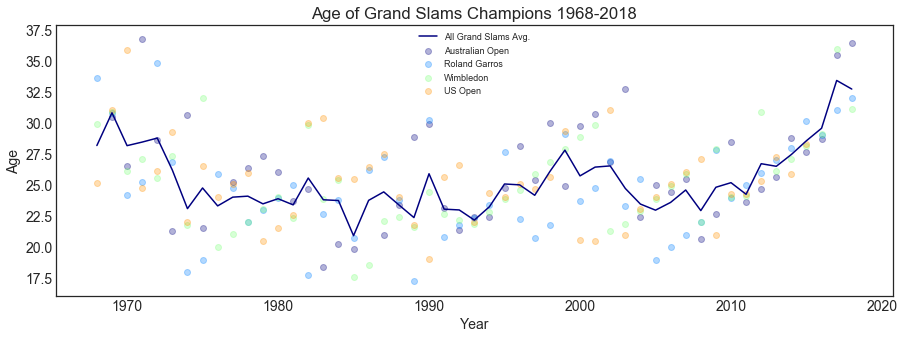

In [194]:
# What is the average age of Grand Slams' players from 1968 up to 2016?
tennis_df_win=tennis_df[tennis_df['tourney_level'].isin(['G'])&(tennis_df['round']=='F')].dropna(subset=['winner_age'])
dfw = tennis_df_win[['tourney_year','tourney_name','winner_name','winner_age']]
dfw.columns = ['tourney_year','tourney_name','player','age']

dfs_final = dfw.groupby(['tourney_year','tourney_name']).agg({'age':'mean'}).reset_index()
dfs_final_2 = dfs_final.groupby(['tourney_year']).agg({'age':'mean'}).reset_index()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

plt.title('Age of Grand Slams Champions 1968-2018')
plt.ylabel('Age')
plt.xlabel('Year')

plt.plot(dfs_final_2['tourney_year'], dfs_final_2['age'])
plt.scatter(dfs_final[dfs_final['tourney_name']=='Australian Open']['tourney_year'], dfs_final[dfs_final['tourney_name']=='Australian Open']['age'], alpha=0.3)
plt.scatter(dfs_final[dfs_final['tourney_name']=='Roland Garros']['tourney_year'], dfs_final[dfs_final['tourney_name']=='Roland Garros']['age'], alpha=0.3)
plt.scatter(dfs_final[dfs_final['tourney_name']=='Wimbledon']['tourney_year'], dfs_final[dfs_final['tourney_name']=='Wimbledon']['age'], alpha=0.3)
plt.scatter(dfs_final[dfs_final['tourney_name']=='US Open']['tourney_year'], dfs_final[dfs_final['tourney_name']=='US Open']['age'], alpha=0.3)

plt.legend(['All Grand Slams Avg.','Australian Open', 'Roland Garros', 'Wimbledon', 'US Open'], loc='upper center',prop={'size': 9})


## Retirements
** What is the evolution of retirements over time? In which tournament we see most of these retirements? **

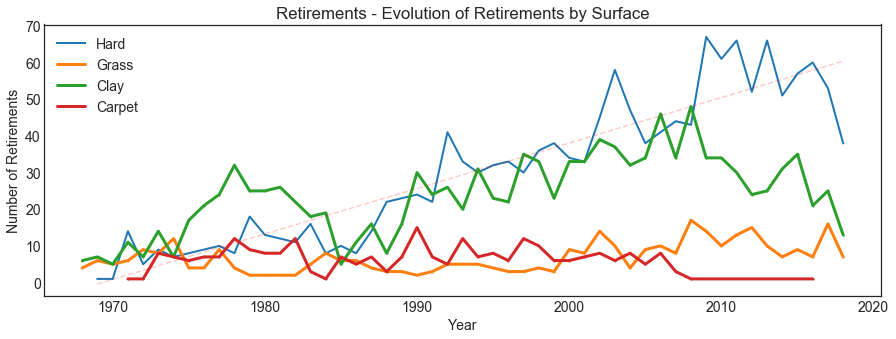

In [195]:
# Extract retirements
ret_df = tennis_df[tennis_df['score'].str.contains("RET")==True][['tourney_year','tourney_level','surface','tourney_id','winner_name']]
ref_df_f = ret_df.groupby(['tourney_year','surface'], as_index=False).agg('count')

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
plt.style.use('seaborn-colorblind')

plt.title('Retirements - Evolution of Retirements by Surface')
plt.ylabel('Number of Retirements')
plt.xlabel('Year')
plt.plot(ref_df_f[ref_df_f['surface']=='Hard']['tourney_year'], ref_df_f[ref_df_f['surface']=='Hard']['tourney_id'], linestyle='solid', linewidth=2, solid_capstyle='projecting')
plt.plot(ref_df_f[ref_df_f['surface']=='Grass']['tourney_year'], ref_df_f[ref_df_f['surface']=='Grass']['tourney_id'], linestyle='solid', marker='o', markerfacecolor='black', markersize=1, linewidth=3)
plt.plot(ref_df_f[ref_df_f['surface']=='Clay']['tourney_year'], ref_df_f[ref_df_f['surface']=='Clay']['tourney_id'], linestyle='solid', marker='o', markerfacecolor='black', markersize=1, linewidth=3)
plt.plot(ref_df_f[ref_df_f['surface']=='Carpet']['tourney_year'], ref_df_f[ref_df_f['surface']=='Carpet']['tourney_id'], linestyle='solid', marker='o', markerfacecolor='black', markersize=1, linewidth=3)

# Calc the trendline for hard court
x = ref_df_f[ref_df_f['surface']=='Hard']['tourney_year'].astype(int)
y = ref_df_f[ref_df_f['surface']=='Hard']['tourney_id'].astype(int)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x),"r--", alpha=0.2)

plt.legend(['Hard', 'Grass', 'Clay', 'Carpet'], loc='upper left', prop={'size': 14})

** Do the retirements by tournament type have the same behaviour? **

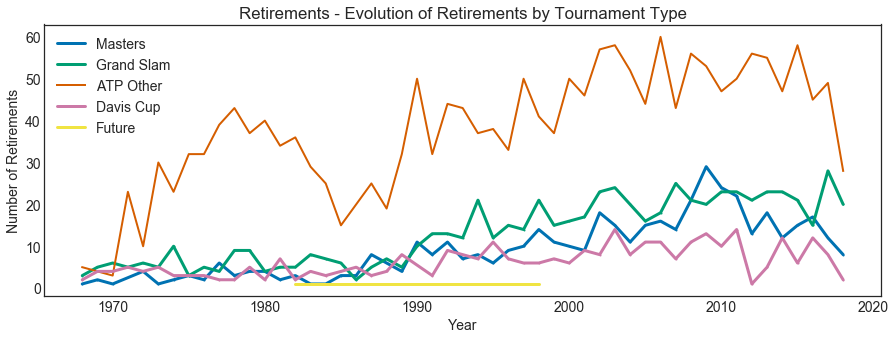

In [41]:
ref_df_f = ret_df.groupby(['tourney_year','tourney_level'], as_index=False).agg('count')

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
plt.style.use('seaborn-colorblind')

plt.title('Retirements - Evolution of Retirements by Tournament Type')
plt.ylabel('Number of Retirements')
plt.xlabel('Year')
plt.plot(ref_df_f[ref_df_f['tourney_level']=='M']['tourney_year'], ref_df_f[ref_df_f['tourney_level']=='M']['tourney_id'], linestyle='solid', marker='o', markerfacecolor='black', markersize=1, linewidth=3)
plt.plot(ref_df_f[ref_df_f['tourney_level']=='G']['tourney_year'], ref_df_f[ref_df_f['tourney_level']=='G']['tourney_id'], linestyle='solid', marker='o', markerfacecolor='black', markersize=1, linewidth=3)
plt.plot(ref_df_f[ref_df_f['tourney_level']=='A']['tourney_year'], ref_df_f[ref_df_f['tourney_level']=='A']['tourney_id'], linestyle='solid', linewidth=2, solid_capstyle='projecting')
plt.plot(ref_df_f[ref_df_f['tourney_level']=='D']['tourney_year'], ref_df_f[ref_df_f['tourney_level']=='D']['tourney_id'], linestyle='solid', marker='o', markerfacecolor='black', markersize=1, linewidth=3)
plt.plot(ref_df_f[ref_df_f['tourney_level']=='F']['tourney_year'], ref_df_f[ref_df_f['tourney_level']=='F']['tourney_id'], linestyle='solid', marker='o', markerfacecolor='black', markersize=1, linewidth=3)

plt.legend(['Masters','Grand Slam', 'ATP Other', 'Davis Cup', 'Future'], loc='upper left', prop={'size': 14})

** Is is just that we have more retirements because there are more matches played in that torunament or surface? What if we consider the ratio of retirements over matches played? **

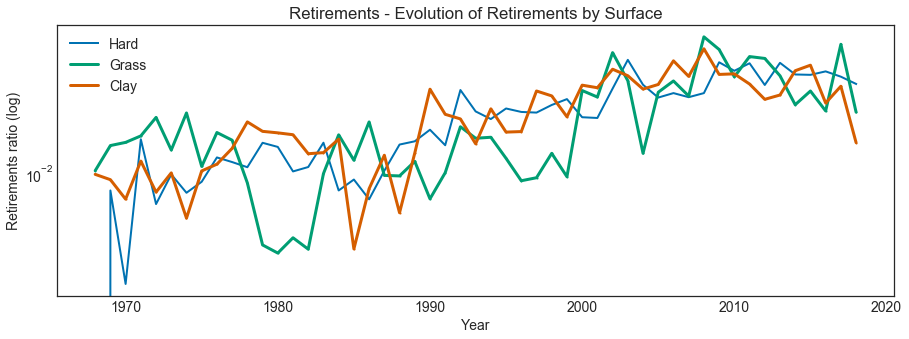

In [227]:
ret_df_f = ret_df.groupby(['tourney_year','surface'], as_index=False).agg('count')[['tourney_year','surface','tourney_id']]
ret_df_f.columns = ['tourney_year','surface','rets']

notret_df = tennis_df[tennis_df['score'].str.contains("RET")==False][['tourney_year','surface','tourney_id']]
notret_df_f = notret_df.groupby(['tourney_year','surface'], as_index=False).agg('count')[['tourney_year','surface','tourney_id']]
notret_df_f.columns = ['tourney_year','surface','norets']

dfs = (ret_df_f, notret_df_f)
dfs_concat = pd.concat(dfs)

dfs_c = dfs_concat.fillna(0).groupby(['tourney_year','surface']).agg({'rets':'sum','norets':'sum'}).reset_index()

dfs_c['ret_ratio'] = np.where(dfs_c['norets']>0, dfs_c['rets']/(dfs_c['rets']+dfs_c['norets']), 1)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
plt.style.use('seaborn-colorblind')

plt.title('Retirements - Evolution of Retirements by Surface')
plt.yscale('log') # Using log scale
plt.ylabel('Retirements ratio (log)')
plt.xlabel('Year')


plt.plot(dfs_c[dfs_c['surface']=='Hard']['tourney_year'], dfs_c[dfs_c['surface']=='Hard']['ret_ratio'], linestyle='solid', linewidth=2, solid_capstyle='projecting')
plt.plot(dfs_c[dfs_c['surface']=='Grass']['tourney_year'], dfs_c[dfs_c['surface']=='Grass']['ret_ratio'], linestyle='solid', marker='o', markerfacecolor='black', markersize=1, linewidth=3)
plt.plot(dfs_c[dfs_c['surface']=='Clay']['tourney_year'], dfs_c[dfs_c['surface']=='Clay']['ret_ratio'], linestyle='solid', marker='o', markerfacecolor='black', markersize=1, linewidth=3)

plt.legend(['Hard','Grass', 'Clay'], loc='upper left', prop={'size': 14})

** We can see there is a growth in retirements over the years. The growth seems to happen across surfaces. Does it also happen across tournament types? **

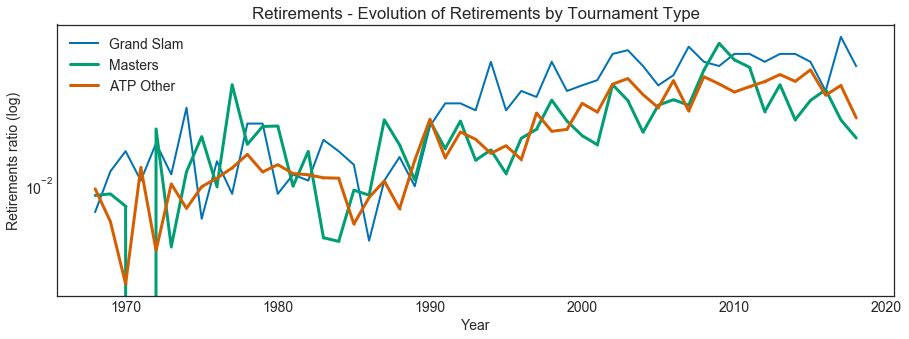

In [197]:
ret_df_f = ret_df.groupby(['tourney_year','tourney_level'], as_index=False).agg('count')[['tourney_year','tourney_level','tourney_id']]
ret_df_f.columns = ['tourney_year','tourney_level','rets']

notret_df = tennis_df[tennis_df['score'].str.contains("RET")==False][['tourney_year','tourney_level','tourney_id']]
notret_df_f = notret_df.groupby(['tourney_year','tourney_level'], as_index=False).agg('count')[['tourney_year','tourney_level','tourney_id']]
notret_df_f.columns = ['tourney_year','tourney_level','norets']

dfs = (ret_df_f, notret_df_f)
dfs_concat = pd.concat(dfs)

dfs_c = dfs_concat.fillna(0).groupby(['tourney_year','tourney_level']).agg({'rets':'sum','norets':'sum'}).reset_index()

dfs_c['ret_ratio'] = np.where(dfs_c['norets']>0, dfs_c['rets']/(dfs_c['rets']+dfs_c['norets']), 1)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
plt.style.use('seaborn-colorblind')

plt.title('Retirements - Evolution of Retirements by Tournament Type')
plt.yscale('log') # Using log scale
plt.ylabel('Retirements ratio (log)')
plt.xlabel('Year')

plt.plot(dfs_c[dfs_c['tourney_level']=='G']['tourney_year'], dfs_c[dfs_c['tourney_level']=='G']['ret_ratio'], linestyle='solid', linewidth=2, solid_capstyle='projecting')
plt.plot(dfs_c[dfs_c['tourney_level']=='M']['tourney_year'], dfs_c[dfs_c['tourney_level']=='M']['ret_ratio'], linestyle='solid', marker='o', markerfacecolor='black', markersize=1, linewidth=3)
plt.plot(dfs_c[dfs_c['tourney_level']=='A']['tourney_year'], dfs_c[dfs_c['tourney_level']=='A']['ret_ratio'], linestyle='solid', marker='o', markerfacecolor='black', markersize=1, linewidth=3)

plt.legend(['Grand Slam','Masters', 'ATP Other'], loc='upper left', prop={'size': 14})


If we look at the retirements ratio by tournament type we can see there has been a higher ratio of retirements in Grand Slam comparing to Masters and other ATP tournaments since the 1990s.

We can see that the number of retirements effectively increased since the 1990s, but why? Tennis has become more physical and competitive over the years and that has had an impact in players' endurance and increase the probability of injuries. Considering this, older players are more prone to retire. 

One way of validating this is checking if there is a relation between the retirements and the age of the player that retired. Let's check.

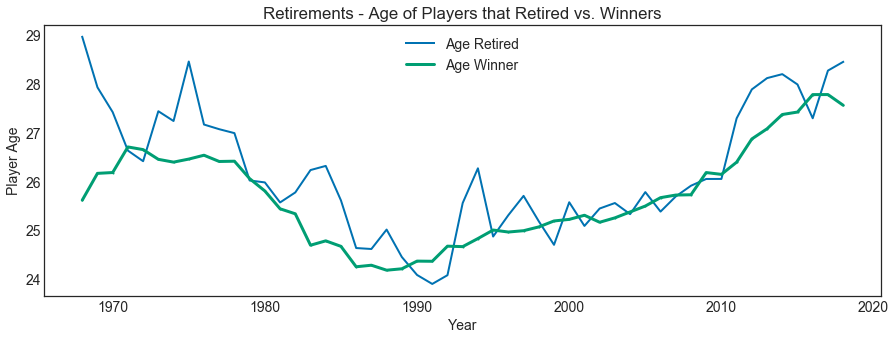

In [199]:
#df_minutes = tennis_df_all[pd.isnull(tennis_df_all['minutes'])==False]
df_ret_age = tennis_df[tennis_df['score'].str.contains("RET")==True].groupby(['tourney_year']).agg({'loser_age':'mean'}).reset_index()
df_ret_age.columns = ['tourney_year','age_ret']

df_notret_age = tennis_df[tennis_df['score'].str.contains("RET")==False].groupby(['tourney_year']).agg({'loser_age':'mean'}).reset_index()
df_notret_age.columns = ['tourney_year','age_notret']

df_age_all = df_ret_age.merge(df_notret_age, on='tourney_year', how='left')

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
plt.style.use('seaborn-colorblind')

plt.title('Retirements - Age of Players that Retired vs. Winners')
plt.ylabel('Player Age')
plt.xlabel('Year')

plt.plot(df_age_all['tourney_year'], df_age_all['age_ret'], linestyle='solid', linewidth=2, solid_capstyle='projecting')
plt.plot(df_age_all['tourney_year'], df_age_all['age_notret'], linestyle='solid', marker='o', markerfacecolor='black', markersize=1, linewidth=3)

plt.legend(['Age Retired','Age Winner'], loc='upper center', prop={'size': 14})

** If we look at countries with the most matches in the ATP, which ones are the ones with the highest retirements' ratio? **

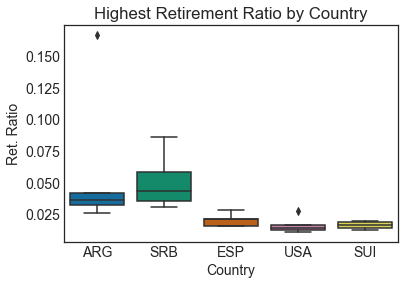

In [200]:
df_ret_cntry = tennis_df[tennis_df['score'].str.contains("RET")==True].groupby(['loser_ioc','tourney_level']).agg('count').reset_index()[['loser_ioc','tourney_level','tourney_id']]
df_ret_cntry.columns = ['country','tourney_level','total_ret']

df_notret_cntry = tennis_df[tennis_df['score'].str.contains("RET")==False].groupby(['loser_ioc','tourney_level']).agg('count').reset_index()[['loser_ioc','tourney_level','tourney_id']]
df_notret_cntry.columns = ['country','tourney_level','total_noret']

df_cntry_all = df_ret_cntry.merge(df_notret_cntry, on=['country','tourney_level'], how='left')

df_cntry_all['ret_ratio'] = df_cntry_all['total_ret']/(df_cntry_all['total_noret']+df_cntry_all['total_ret'])
df_cntry_final = df_cntry_all[df_cntry_all['country'].isin(['ARG','ESP','USA','SUI','SRB'])].sort_values(['ret_ratio'], ascending=False)

ax=sns.boxplot(x="country", y="ret_ratio", data=df_cntry_final)
ax.set(xlabel='Country', ylabel='Ret. Ratio', title='Highest Retirement Ratio by Country')



** Who are the players that retired the most? Not looking at ratios here, just the total number of retirements **

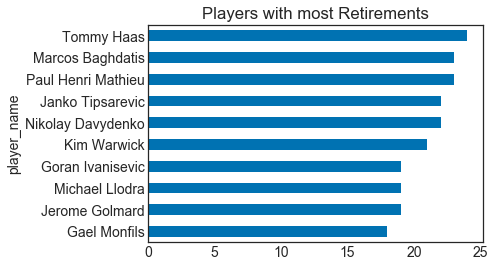

In [201]:
df_ret_players = tennis_df[tennis_df['score'].str.contains("RET")==True].groupby(['loser_name','loser_ioc']).agg('count').reset_index()[['loser_name','loser_ioc','tourney_id']]
df_ret_players.columns = ['player_name','country','total_ret']
df_ret_players = df_ret_players.sort_values(['total_ret'],ascending=False).head(10)

df_ret_players_sorted = df_ret_players.sort_values(['total_ret'],ascending=True)
df_ret_players_sorted.plot('player_name','total_ret', kind='barh', title='Players with most Retirements', legend=False)


** What about the players that played the most matches and never retired from a match? What was their winning ratio? **

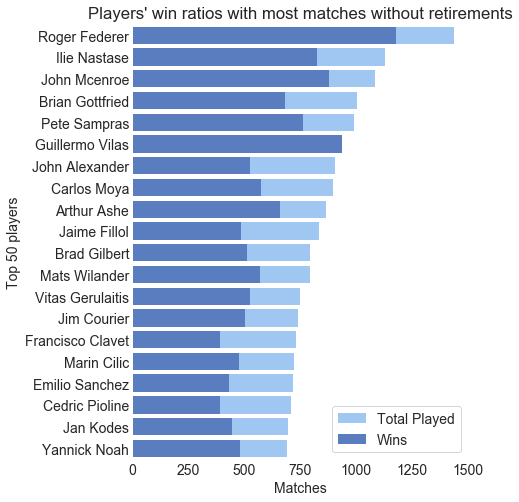

In [203]:
# Wins for each player
df_win_players = tennis_df.groupby(['winner_name']).agg({'tourney_id':'count','tourney_year':'max'}).reset_index()[['winner_name','tourney_id','tourney_year']]
df_win_players.columns = ['player_name','total_won','tourney_year']
df_win_players['year_period'] = pd.cut(df_win_players.tourney_year.astype(int), [1968, 1979, 1989, 1999, 2009, np.inf], labels=['1970s','1980s','1990s','2000s','2010s'])

# Loses for each player
df_lost_players = tennis_df.groupby(['loser_name']).agg({'tourney_id':'count','tourney_year':'max'}).reset_index()[['loser_name','tourney_id','tourney_year']]
df_lost_players.columns = ['player_name','total_lost','tourney_year']
df_lost_players['year_period'] = pd.cut(df_lost_players.tourney_year.astype(int), [1968, 1979, 1989, 1999, 2009, np.inf], labels=['1970s','1980s','1990s','2000s', '2010s'])

# Retirements for each player
df_ret_players = tennis_df[tennis_df['score'].str.contains("RET")==True].groupby(['loser_name']).agg({'tourney_id':'count','tourney_year':'max'}).reset_index()[['loser_name','tourney_id','tourney_year']]
df_ret_players.columns = ['player_name','total_ret','tourney_year']
df_ret_players['year_period'] = pd.cut(df_ret_players.tourney_year.astype(int), [1968, 1979, 1989, 1999, 2009, np.inf], labels=['1970s','1980s','1990s','2000s', '2010s'])

# Concatenate data frames
dfs_players = (df_win_players, df_lost_players, df_ret_players)
dfs_players_concat = pd.concat(dfs_players)

# Group by player name and year period
dfs_players_final = dfs_players_concat.groupby(['player_name','year_period']).agg({'total_won':'sum','total_lost':'sum','total_ret':'sum'}).fillna(0).reset_index()

dfs_players_final['total_played'] = dfs_players_final['total_won']+dfs_players_final['total_lost']+dfs_players_final['total_ret']
dfs_players_final['win_ratio'] = dfs_players_final['total_won']/(dfs_players_final['total_won']+dfs_players_final['total_lost']+dfs_players_final['total_ret'])

dfs_players_top = dfs_players_final[dfs_players_final['total_ret']==0].sort_values(['total_played'],ascending=False).head(20)

f, ax = plt.subplots(figsize=(6, 8))

# Plot player names with total matches played
sns.set_color_codes("pastel")
sns.barplot(x="total_played", y="player_name", data=dfs_players_top, 
            label="Total Played", color="b")
               
# Plot player names with total wins
sns.set_color_codes("muted")
sns.barplot(x="total_won", y="player_name", data=dfs_players_top, label="Wins", color="b")

ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 1500), ylabel="Top 50 players",
       xlabel="Matches", title="Players' win ratios with most matches without retirements")
sns.despine(left=True, bottom=True)



** All these players are from different time periods. Let's see, how many of the top 10 were actually playing together. ** 

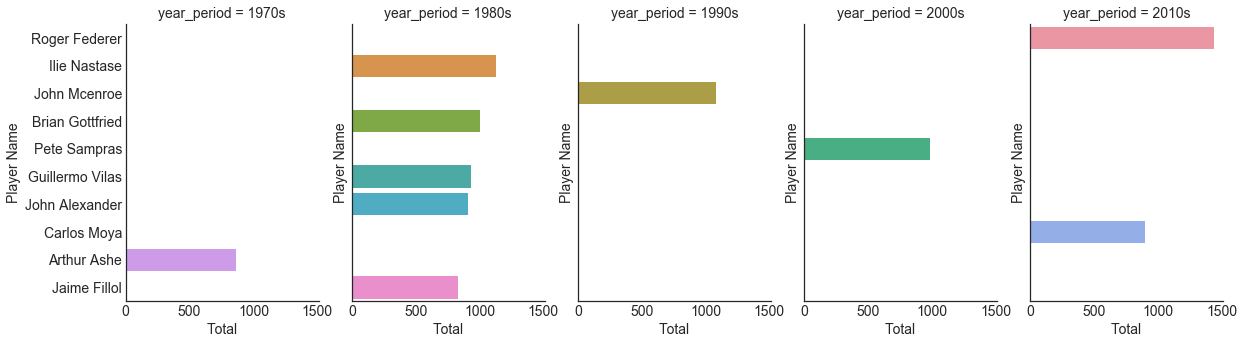

In [204]:
ax=sns.factorplot(x="total_played",y="player_name",
                   col="year_period",
                   data=dfs_players_top.head(10), kind="bar",
                   size=5, aspect=.7);
ax.set(xlabel="Total", ylabel="Player Name")

## Longest career spans ##
** Which players have had the longest career spans? At what age did they stop playing? **

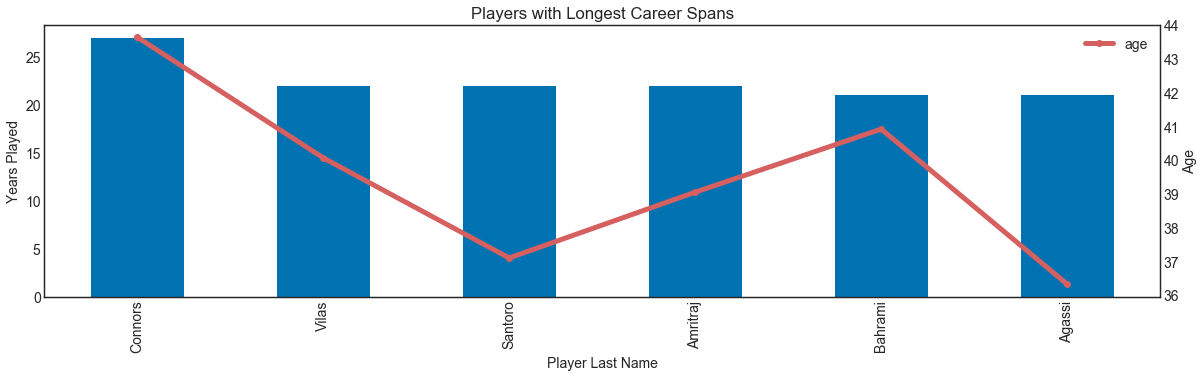

In [211]:
# Calculate age, min and max year for players
df_winnners_bio = tennis_df.groupby(['winner_name']).agg({'winner_age':'max','tourney_year':['min','max']}).reset_index().fillna(0)
df_winnners_bio.columns = ['player_name','age', 'year_min', 'year_max']

df_losers_bio = tennis_df.groupby(['loser_name']).agg({'loser_age':'max','tourney_year':['min','max']}).reset_index().fillna(0)
df_losers_bio.columns = ['player_name','age', 'year_min', 'year_max']

dfs_bio = (df_winnners_bio, df_losers_bio)
dfs_bio_concat = pd.concat(dfs_bio)

dfs_bio_final = dfs_bio_concat.groupby(['player_name']).agg({'age':'max','year_min':'min', 'year_max' : 'max'}).reset_index()

# Calculate active years for players
df_winners_years = tennis_df.groupby(['winner_name','tourney_year']).agg({'tourney_id':'count'}).reset_index()#.groupby(['winner_name']).agg({'tourney_year':'count'}).sort_values(['tourney_year'], ascending=False)
df_winners_years.columns = ['player_name','tourney_year','count']

df_losers_years = tennis_df.groupby(['loser_name','tourney_year']).agg({'tourney_id':'count'}).reset_index()#.groupby(['winner_name']).agg({'tourney_year':'count'}).sort_values(['tourney_year'], ascending=False)
df_losers_years.columns = ['player_name','tourney_year','count']

dfs = (df_winners_years, df_losers_years)
dfs_concat = pd.concat(dfs)

df_player_years = dfs_concat.groupby(['player_name','tourney_year']).agg({'tourney_year':'count'}).groupby(['player_name']).agg({'tourney_year':'count'}).reset_index().sort_values(['tourney_year'], ascending=False).head(10)

df_player_final = df_player_years.merge(dfs_bio_final, on='player_name')

# Exclude last year because they may still be playing
df_player_final = df_player_final[df_player_final['year_max'].astype(int) < 2016]

df_player_final['player_lname'] = df_player_final['player_name'].str.split(" ").str.get(1)

f, ax1 = plt.subplots(figsize=(20, 5))
ax2 = ax1.twinx()

df_player_final.plot(ax=ax2, x='player_lname', y='age', marker='o', color='r', linewidth='5', title='Players with Longest Career Spans')
df_player_final.plot(ax=ax1, x='player_lname', y='tourney_year', kind='bar', legend=False)
ax1.set_xlabel('Player Last Name')
ax1.set_ylabel('Years Played')
ax2.set_ylabel('Age')


## Head to Head ##
** Which players played the most head to head matches per time period? **

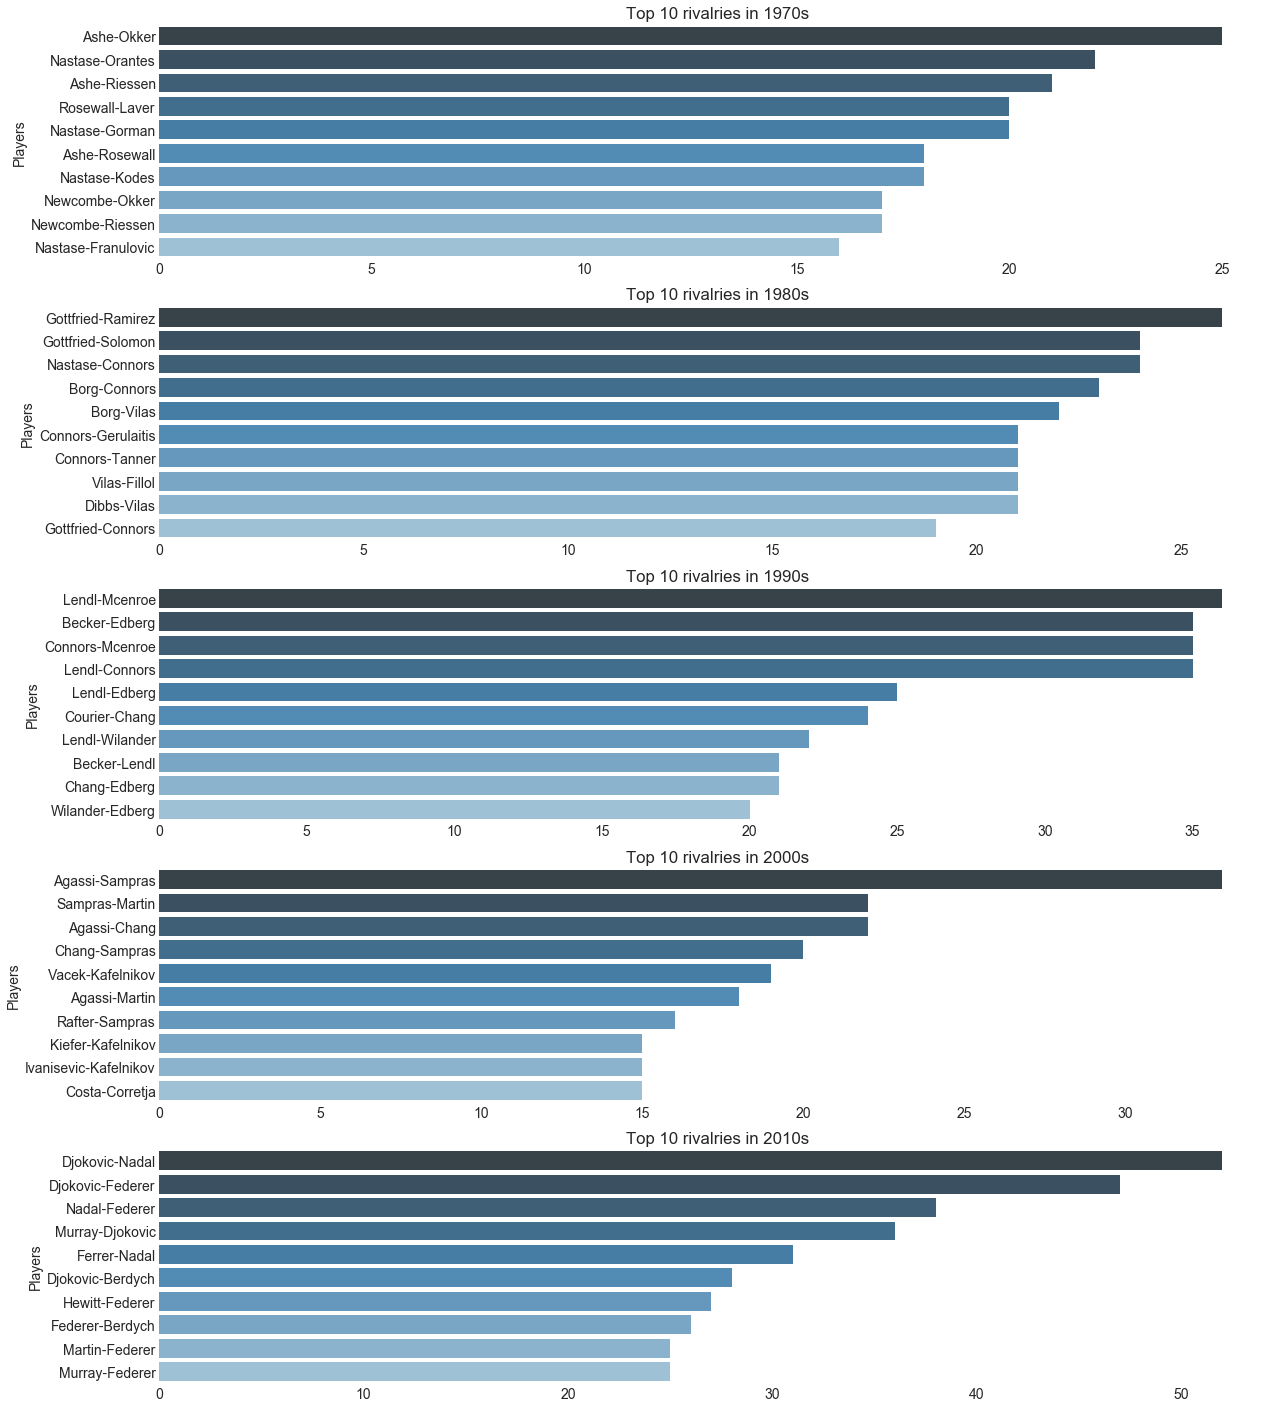

In [50]:
h2h_wl = tennis_df_all.groupby(['winner_name','loser_name']).agg({'tourney_id':'count','tourney_year':'max'}).reset_index()
h2h_wl.columns = ['player_a','player_b','total','year']

h2h_lw = tennis_df_all.groupby(['loser_name','winner_name']).agg({'tourney_id':'count','tourney_year':'max'}).reset_index()
h2h_lw.columns = ['player_a','player_b','total','year']

h2h_f = h2h_wl.merge(h2h_lw, on=['player_a', 'player_b'])
h2h_f['total'] = h2h_f['total_x'] + h2h_f['total_y']

h2h_f['player_a'] = np.where(h2h_f['player_a'] < h2h_f['player_b'], h2h_f['player_a'], h2h_f['player_b'])
h2h_f['player_b'] = np.where(h2h_f['player_a'] > h2h_f['player_b'], h2h_f['player_a'], h2h_f['player_b'])
h2h_f['year'] = np.where(h2h_f['year_x'] > h2h_f['year_y'], h2h_f['year_x'], h2h_f['year_y'])
h2h_f['names'] = h2h_f['player_a'].str.split(" ").str.get(1) + "-" + h2h_f['player_b'].str.split(" ").str.get(1)

h2h_f2 = h2h_f.groupby(['player_a','player_b','names']).agg({'total':'max','year':'max'}).reset_index()
h2h_f2_sorted = h2h_f2[h2h_f2['player_a']!=h2h_f2['player_b']].sort_values(['total'], ascending=False)#.head(20)

h2h_f2_sorted['year_period'] = pd.cut(h2h_f2_sorted.year.astype(int), [1968, 1979, 1989, 1999, 2009, np.inf], labels=['1970s','1980s','1990s','2000s', '2010s'])
#h2h_f2_sorted

#f, ax = plt.subplots(figsize=(25, 15))
plt.figure(figsize=(20,25))

plt.subplot(5,1,1)
ax1=sns.barplot(x="total", y="names", palette='Blues_d', data=h2h_f2_sorted[h2h_f2_sorted.year_period=='1970s'].head(10))
ax1.set(xlabel='', ylabel='Players', title='Top 10 rivalries in 1970s')

plt.subplot(5,1,2)
ax2=sns.barplot(x="total", y="names", palette='Blues_d', data=h2h_f2_sorted[h2h_f2_sorted.year_period=='1980s'].head(10))
ax2.set(xlabel='', ylabel='Players', title='Top 10 rivalries in 1980s')

plt.subplot(5,1,3)
ax3=sns.barplot(x="total", y="names", palette='Blues_d', data=h2h_f2_sorted[h2h_f2_sorted.year_period=='1990s'].head(10))
ax3.set(xlabel='', ylabel='Players', title='Top 10 rivalries in 1990s')

plt.subplot(5,1,4)
ax4=sns.barplot(x="total", y="names", palette='Blues_d', data=h2h_f2_sorted[h2h_f2_sorted.year_period=='2000s'].head(10))
ax4.set(xlabel='', ylabel='Players', title='Top 10 rivalries in 2000s')

plt.subplot(5,1,5)
ax5=sns.barplot(x="total", y="names", palette='Blues_d', data=h2h_f2_sorted[h2h_f2_sorted.year_period=='2010s'].head(10))
ax5.set(xlabel='', ylabel='Players', title='Top 10 rivalries in 2010s')

sns.despine(left=True, bottom=True)

# Other interesting questions
- What is the evolution of retirements over time? Were they retirements in finals?
- Who won the most matches because of retirements?
- Who lost the most matches because of retirements?
- Duration, Aces, Easy wins (6-0, 6-0)
- What were the biggest comebacks in history of tennis? Coming from two sets down to win in GS?
- How often top seeds won ATP tournaments
- What is the win/lose ratio for right/left handed players? Has this changed over time?